In [1]:
import pandas as pd
df=pd.read_csv("iotFinal.csv")
df

temp1  temp2  ldr heater  humidity1  humidity2 pump
0        30     30  249     ON         17         52   ON
1        34     30  908     ON         55         47   ON
2        37     27  745    OFF         35         51  OFF
3        38     25  679    OFF         28         41   ON
4        39     29   54     ON         59         50   ON
...     ...    ...  ...    ...        ...        ...  ...
2633     34     29  246    OFF         46         87   ON
2634     38     26  246    OFF         47         91   ON
2635     37     24  246    OFF         11         93   ON
2636     32     23  246    OFF         20         94   ON
2637     31     23  246    OFF         23         41   ON

[2638 rows x 7 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   temp1      2638 non-null   int64 
 1   temp2      2638 non-null   int64 
 2   ldr        2638 non-null   int64 
 3   heater     2638 non-null   object
 4   humidity1  2638 non-null   int64 
 5   humidity2  2638 non-null   int64 
 6   pump       2638 non-null   object
dtypes: int64(5), object(2)
memory usage: 144.4+ KB


In [3]:
df.describe()

temp1        temp2          ldr    humidity1    humidity2
count  2638.000000  2638.000000  2638.000000  2638.000000  2638.000000
mean     34.982942    24.999242   338.070887    32.248673    69.540940
std       3.143890     3.167789   228.230910    16.219658    17.561778
min      30.000000    20.000000    10.000000     5.000000    40.000000
25%      32.000000    22.000000   246.000000    18.000000    54.000000
50%      35.000000    25.000000   246.000000    32.000000    70.000000
75%      38.000000    28.000000   246.000000    46.000000    85.000000
max      40.000000    30.000000   999.000000    60.000000   100.000000

In [0]:
#creating codes for heater state
heaterCodes = []
for i in df.heater:
  if(i=="ON"):
    heaterCodes.append(1)
  elif(i=="OFF"):
    heaterCodes.append(0)
  else:
    heaterCodes.append(-1)

In [5]:
df["heaterCode"]=heaterCodes
df

temp1  temp2  ldr heater  humidity1  humidity2 pump  heaterCode
0        30     30  249     ON         17         52   ON           1
1        34     30  908     ON         55         47   ON           1
2        37     27  745    OFF         35         51  OFF           0
3        38     25  679    OFF         28         41   ON           0
4        39     29   54     ON         59         50   ON           1
...     ...    ...  ...    ...        ...        ...  ...         ...
2633     34     29  246    OFF         46         87   ON           0
2634     38     26  246    OFF         47         91   ON           0
2635     37     24  246    OFF         11         93   ON           0
2636     32     23  246    OFF         20         94   ON           0
2637     31     23  246    OFF         23         41   ON           0

[2638 rows x 8 columns]

In [0]:
#creating codes for pump states
pumpCodes = []
for j in df.pump:
  if(j=="ON"):
    pumpCodes.append(1)
  elif(j=="OFF"):
    pumpCodes.append(0)
  else:
    pumpCodes.append(-1)

In [7]:
df["pumpCode"]=pumpCodes
df

temp1  temp2  ldr heater  humidity1  humidity2 pump  heaterCode  pumpCode
0        30     30  249     ON         17         52   ON           1         1
1        34     30  908     ON         55         47   ON           1         1
2        37     27  745    OFF         35         51  OFF           0         0
3        38     25  679    OFF         28         41   ON           0         1
4        39     29   54     ON         59         50   ON           1         1
...     ...    ...  ...    ...        ...        ...  ...         ...       ...
2633     34     29  246    OFF         46         87   ON           0         1
2634     38     26  246    OFF         47         91   ON           0         1
2635     37     24  246    OFF         11         93   ON           0         1
2636     32     23  246    OFF         20         94   ON           0         1
2637     31     23  246    OFF         23         41   ON           0         1

[2638 rows x 9 columns]

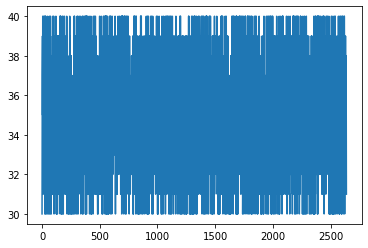

In [8]:
df["temp1"].plot()

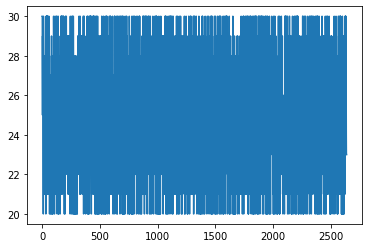

In [9]:
df["temp2"].plot()

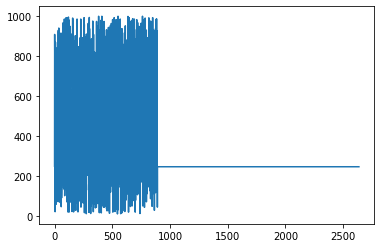

In [10]:
df["ldr"].plot()

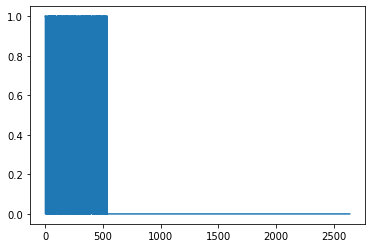

In [11]:
df["heaterCode"].plot()

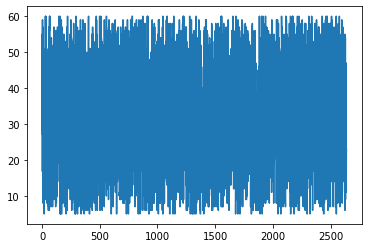

In [12]:
df["humidity1"].plot()

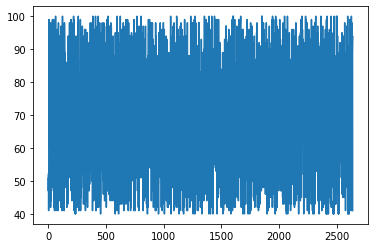

In [14]:
df["humidity2"].plot()

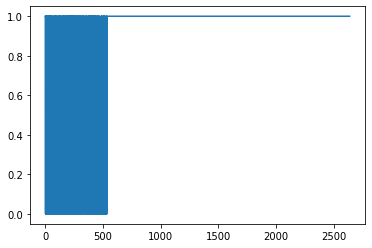

In [17]:
df["pumpCode"].plot()

In [19]:
x=df[["temp1","temp2","heaterCode","humidity1","humidity2","pumpCode"]]
y=df["ldr"]
x

temp1  temp2  heaterCode  humidity1  humidity2  pumpCode
0        30     30           1         17         52         1
1        34     30           1         55         47         1
2        37     27           0         35         51         0
3        38     25           0         28         41         1
4        39     29           1         59         50         1
...     ...    ...         ...        ...        ...       ...
2633     34     29           0         46         87         1
2634     38     26           0         47         91         1
2635     37     24           0         11         93         1
2636     32     23           0         20         94         1
2637     31     23           0         23         41         1

[2638 rows x 6 columns]

In [20]:
x.describe()

temp1        temp2  ...    humidity2     pumpCode
count  2638.000000  2638.000000  ...  2638.000000  2638.000000
mean     34.982942    24.999242  ...    69.540940     0.895754
std       3.143890     3.167789  ...    17.561778     0.305637
min      30.000000    20.000000  ...    40.000000     0.000000
25%      32.000000    22.000000  ...    54.000000     1.000000
50%      35.000000    25.000000  ...    70.000000     1.000000
75%      38.000000    28.000000  ...    85.000000     1.000000
max      40.000000    30.000000  ...   100.000000     1.000000

[8 rows x 6 columns]

In [0]:
#making imports
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#creating variables
train_x, val_x, train_y, val_y = train_test_split(x,y,random_state=0)

In [22]:
#defining and fitting model using RandomForestRegressor
ldr_model= RandomForestRegressor(random_state=1)
ldr_model.fit(train_x,train_y)
#getting predicted values
val_predictions = ldr_model.predict(val_x)
#printing error
print("Mean absolute error is: ")
print(mean_absolute_error(val_y,val_predictions))

Mean absolute error is: 
158.102327020202


In [23]:
#Printing predictions for head
print("Making predictions for the following five etries (given temp1, temp2, heaterCode, humidity1, humidity2, pumpCode): ")
print(x.head())
print("the predictions are")
print(ldr_model.predict(x.head()))

Making predictions for the following five etries (given temp1, temp2, heaterCode, humidity1, humidity2, pumpCode): 
   temp1  temp2  heaterCode  humidity1  humidity2  pumpCode
0     30     30           1         17         52         1
1     34     30           1         55         47         1
2     37     27           0         35         51         0
3     38     25           0         28         41         1
4     39     29           1         59         50         1
the predictions are
[246.59 474.33 676.76 575.19 427.68]


In [24]:
#Printing predictions for tail
print("Making predictions for the following five etries (given temp1, temp2, heaterCode, humidity1, humidity2, pumpCode): ")
print(x.tail())
print("the predictions are")
print(ldr_model.predict(x.tail()))

Making predictions for the following five etries (given temp1, temp2, heaterCode, humidity1, humidity2, pumpCode): 
      temp1  temp2  heaterCode  humidity1  humidity2  pumpCode
2633     34     29           0         46         87         1
2634     38     26           0         47         91         1
2635     37     24           0         11         93         1
2636     32     23           0         20         94         1
2637     31     23           0         23         41         1
the predictions are
[253.02 292.29 260.01 295.92 281.9 ]


In [25]:
#Printing predictions from question
print("Making predictions for the following entry (given temp1, temp2, heaterCode, humidity1, humidity2, pumpCode):")
print("[temp1=40, temp2=20, heater=off, humidity1=60, humidity2=90, and pump =on]")
print("the prediction is: ")
#NB: on is 1 and off is 0
print(ldr_model.predict([[40,20,0,60,90,1]]))

Making predictions for the following entry (given temp1, temp2, heaterCode, humidity1, humidity2, pumpCode):
[temp1=40, temp2=20, heater=off, humidity1=60, humidity2=90, and pump =on]
the prediction is: 
[380.04]


In [26]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


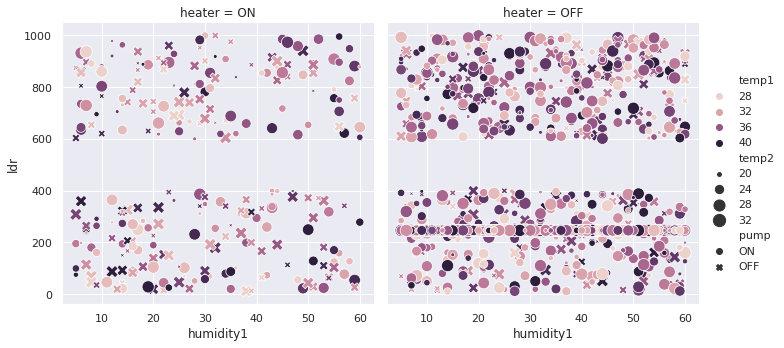

In [27]:
sns.relplot(x="humidity1", y="ldr", col="heater",
            hue="temp1", style="pump", size="temp2",sizes=(15, 150),
            data=df);

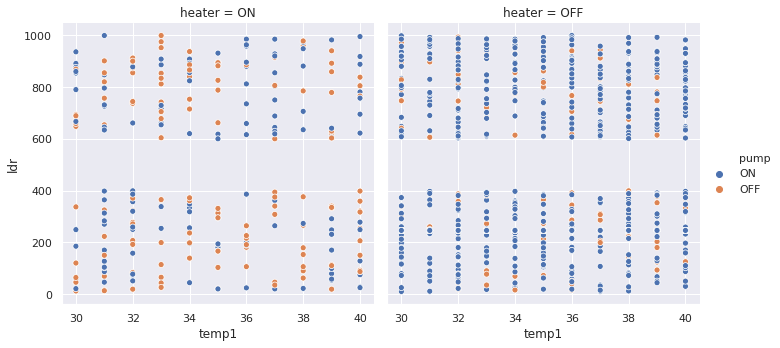

In [28]:
sns.relplot(x="temp1", y="ldr",col="heater",hue="pump", data=df);

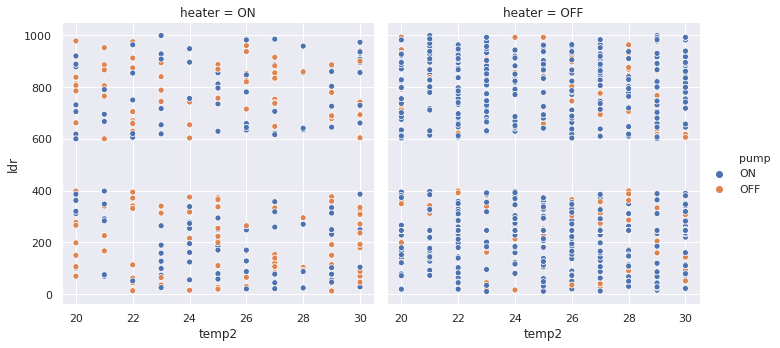

In [29]:
sns.relplot(x="temp2", y="ldr",col="heater",hue="pump", data=df);

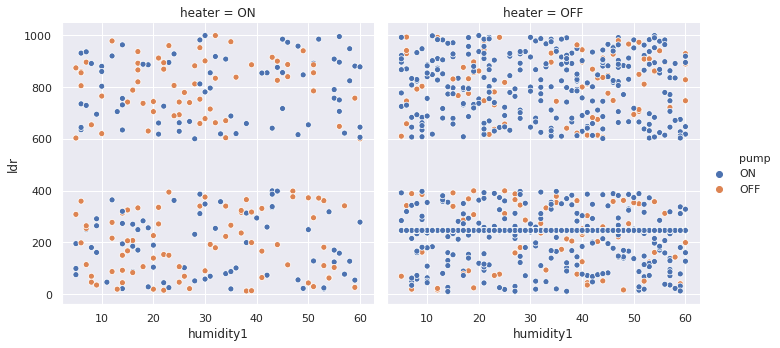

In [30]:
sns.relplot(x="humidity1", y="ldr",col="heater",hue="pump", data=df);

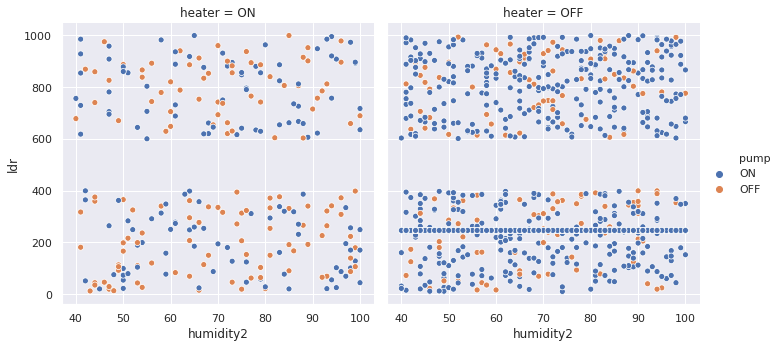

In [31]:
sns.relplot(x="humidity2", y="ldr",col="heater",hue="pump", data=df);

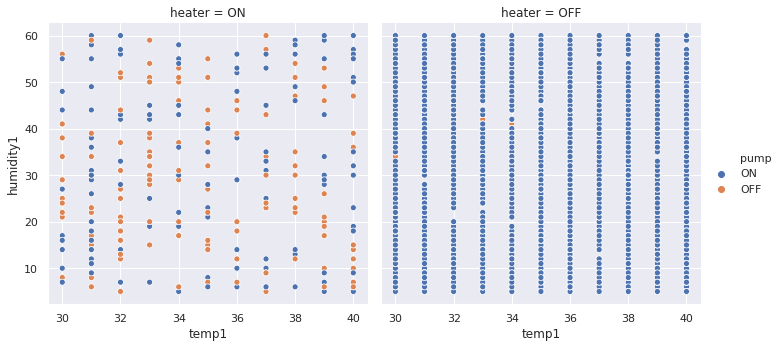

In [32]:
sns.relplot(x="temp1", y="humidity1",col="heater",hue="pump", data=df);

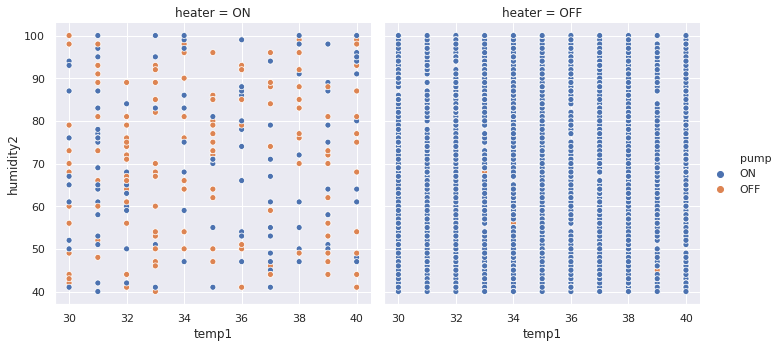

In [33]:
sns.relplot(x="temp1", y="humidity2",col="heater",hue="pump", data=df);

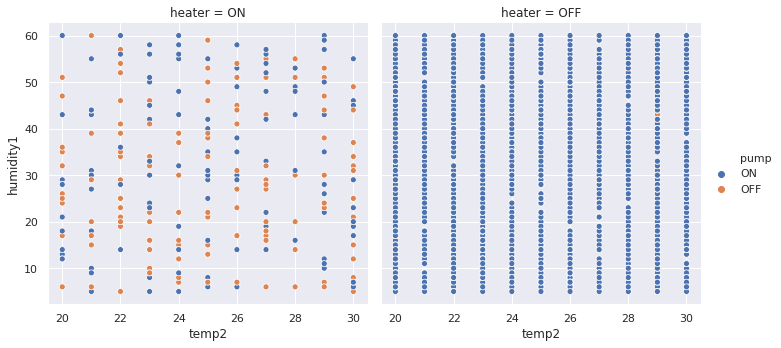

In [34]:
sns.relplot(x="temp2", y="humidity1",col="heater",hue="pump", data=df);

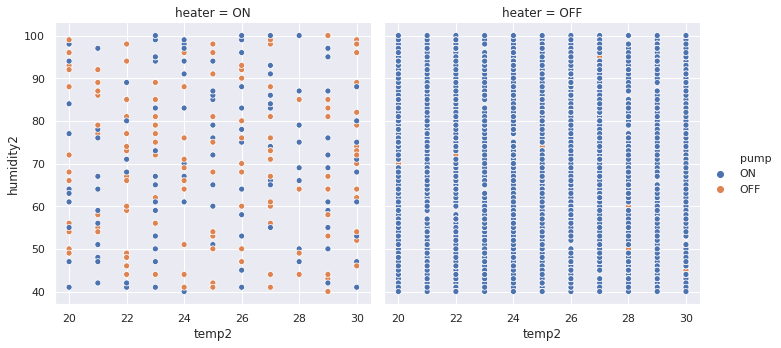

In [35]:
sns.relplot(x="temp2", y="humidity2",col="heater",hue="pump", data=df);

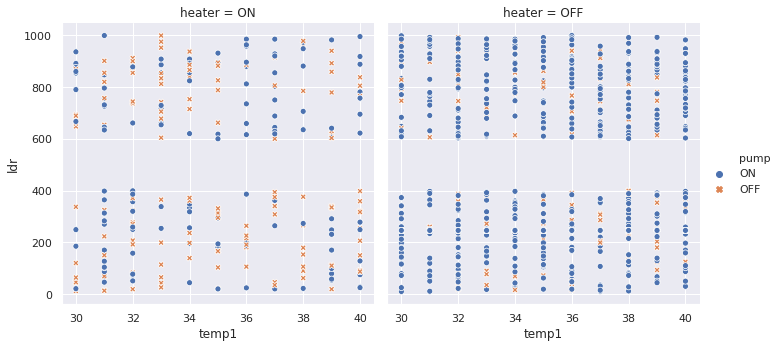

In [36]:
sns.relplot(x="temp1", y="ldr",col="heater",hue="pump",style="pump", data=df);

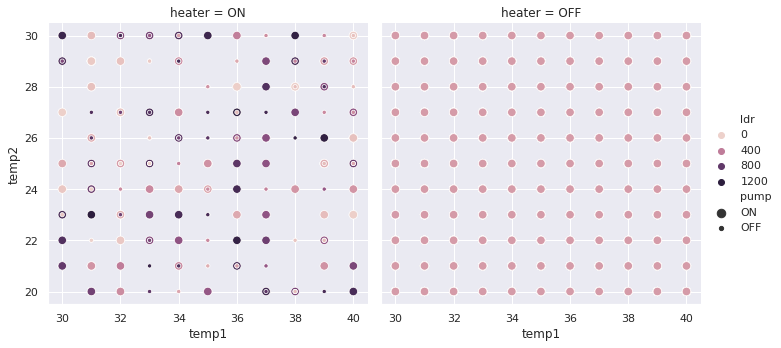

In [37]:
sns.relplot(x="temp1", y="temp2",col="heater",hue="ldr", size="pump", data=df);

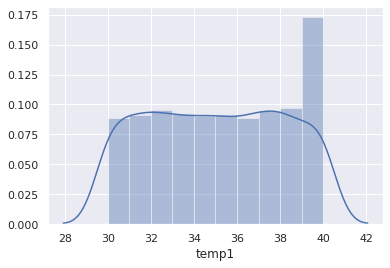

In [38]:
sns.distplot(df["temp1"],bins=10)

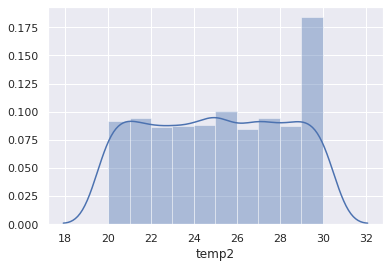

In [39]:
sns.distplot(df["temp2"],bins=10)

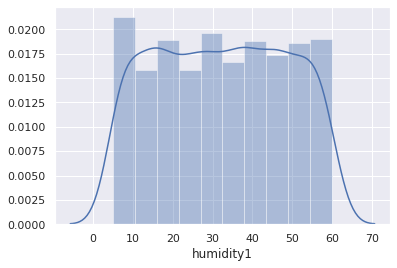

In [40]:
sns.distplot(df["humidity1"],bins=10)

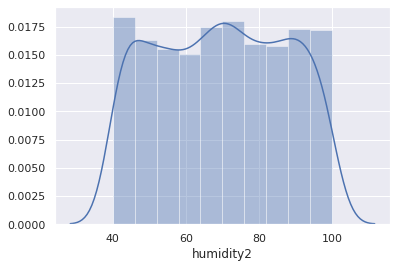

In [41]:
sns.distplot(df["humidity2"],bins=10)

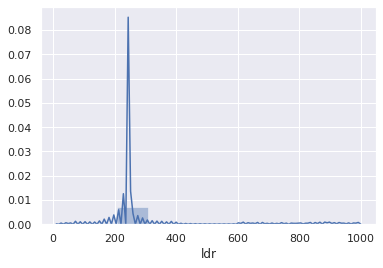

In [42]:
sns.distplot(df["ldr"],bins=10)

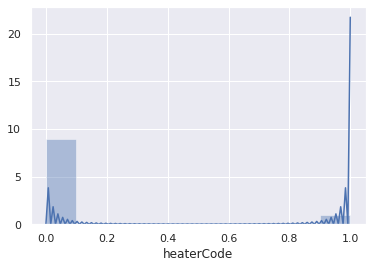

In [43]:
sns.distplot(df["heaterCode"],bins=10)

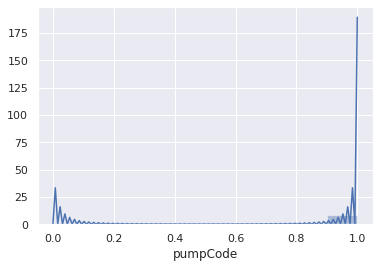

In [44]:
sns.distplot(df["pumpCode"],bins=10)

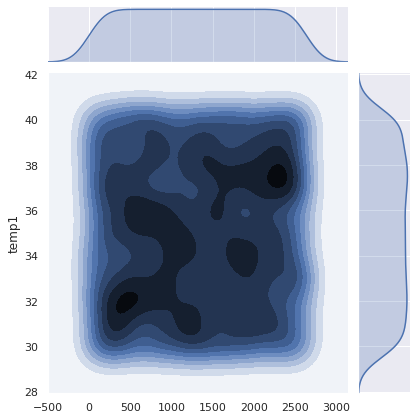

In [45]:
sns.jointplot(data = df, x = range(2638), y = "temp1", kind='kde')

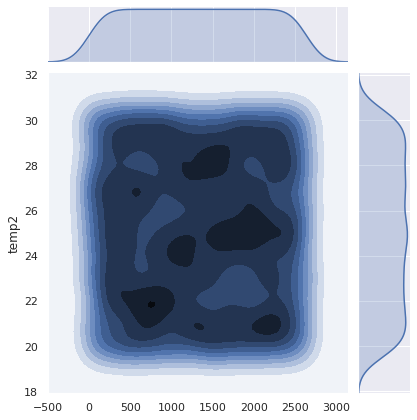

In [46]:
sns.jointplot(data = df, x = range(2638), y = "temp2", kind='kde')

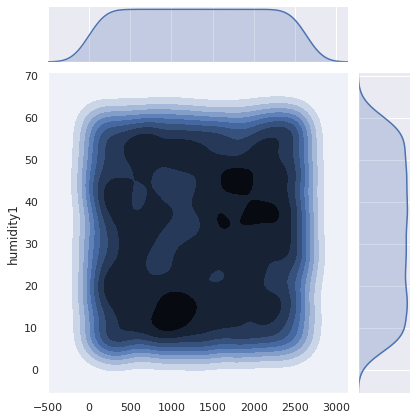

In [47]:
sns.jointplot(data = df, x = range(2638), y = "humidity1", kind='kde')

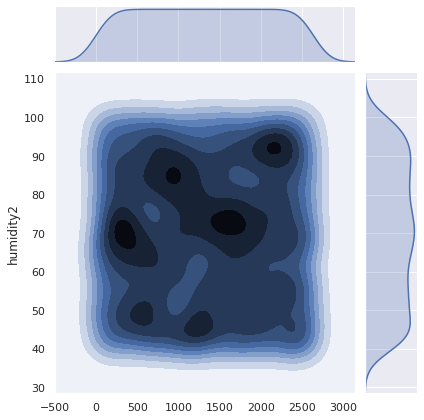

In [48]:
sns.jointplot(data = df, x = range(2638), y = "humidity2", kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: Runtim

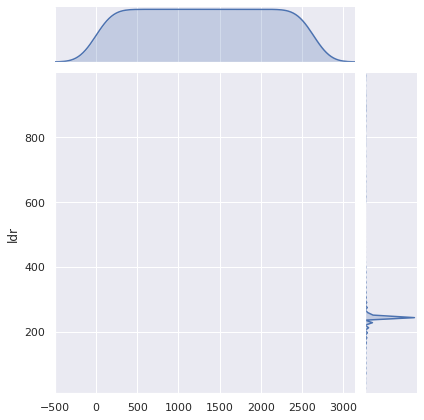

In [49]:
sns.jointplot(data = df, x = range(2638), y = "ldr", kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: Runtim

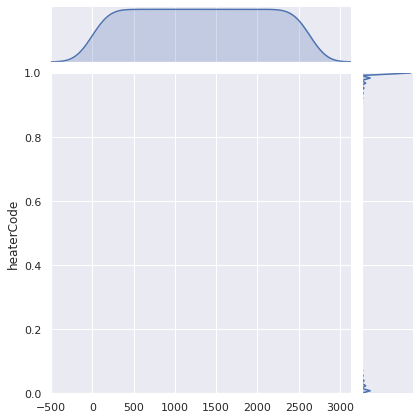

In [50]:
sns.jointplot(data = df, x = range(2638), y = "heaterCode", kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: Runtim

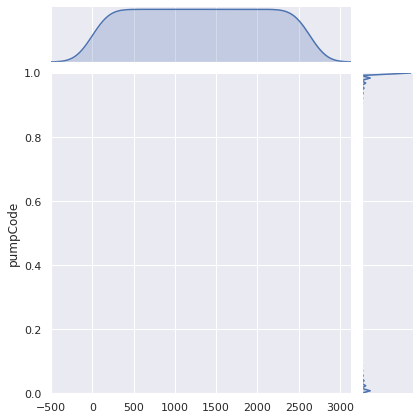

In [51]:
sns.jointplot(data = df, x = range(2638), y = "pumpCode", kind='kde')

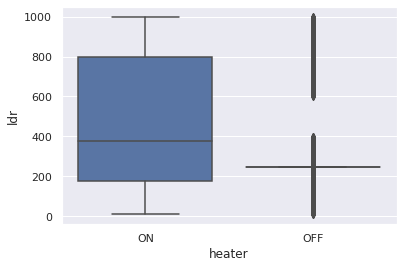

In [52]:
sns.boxplot(data = df, x = "heater", y = "ldr")

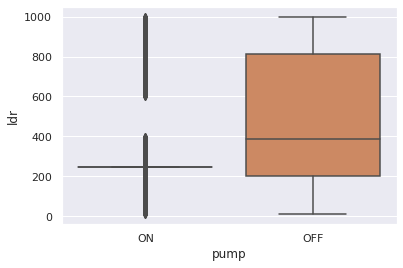

In [53]:
sns.boxplot(data = df, x = "pump", y = "ldr")

In [54]:
sns.boxplot(data = df, x = "heater", y = "temp1")pu

SyntaxError: ignored

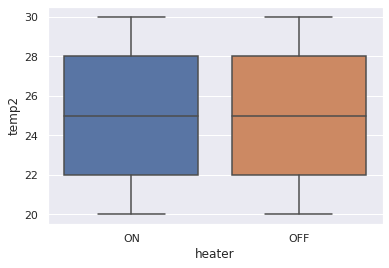

In [55]:
sns.boxplot(data = df, x = "heater", y = "temp2")

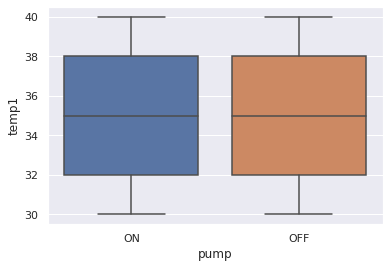

In [56]:
sns.boxplot(data = df, x = "pump", y = "temp1")

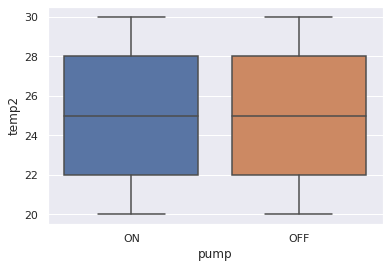

In [57]:
sns.boxplot(data = df, x = "pump", y = "temp2")

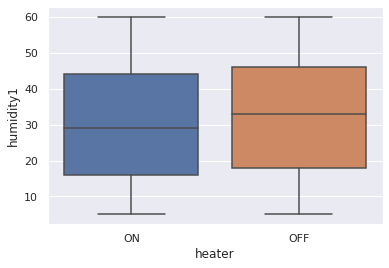

In [58]:
sns.boxplot(data = df, x = "heater", y = "humidity1")

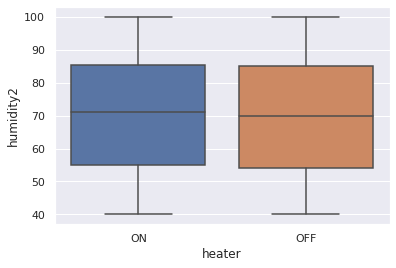

In [59]:
sns.boxplot(data = df, x = "heater", y = "humidity2")

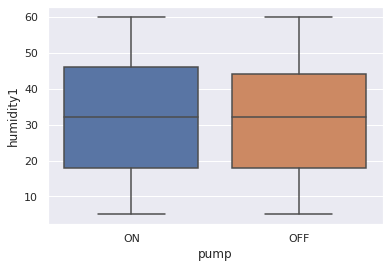

In [60]:
sns.boxplot(data = df, x = "pump", y = "humidity1")

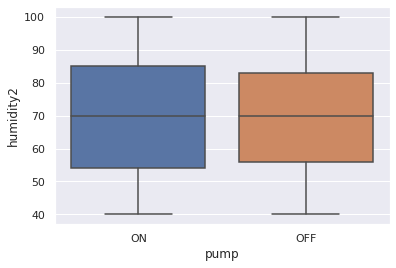

In [61]:
sns.boxplot(data = df, x = "pump", y = "humidity2")

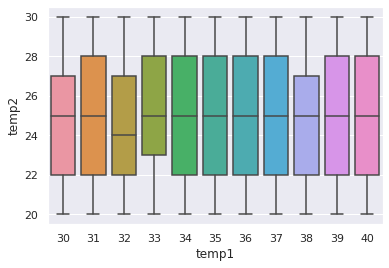

In [62]:
sns.boxplot(data = df, x = "temp1", y = "temp2")

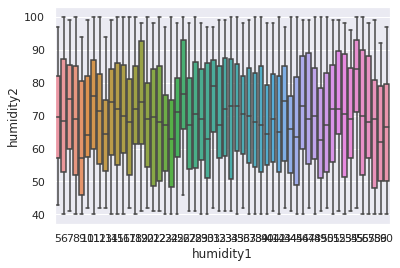

In [63]:
sns.boxplot(data = df, x = "humidity1", y = "humidity2")

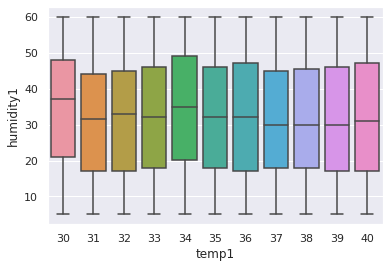

In [64]:
sns.boxplot(data = df, x = "temp1", y = "humidity1")

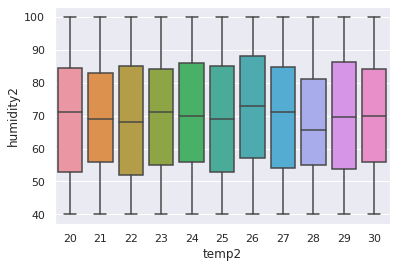

In [65]:
sns.boxplot(data = df, x = "temp2", y = "humidity2")

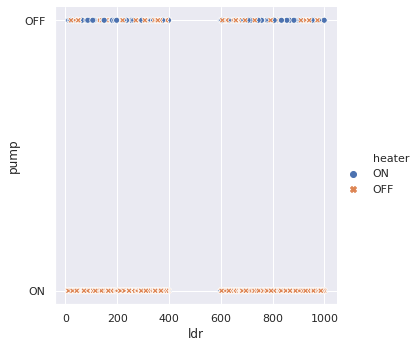

In [66]:
sns.relplot(x="ldr",y="pump", style="heater",hue="heater", data=df);

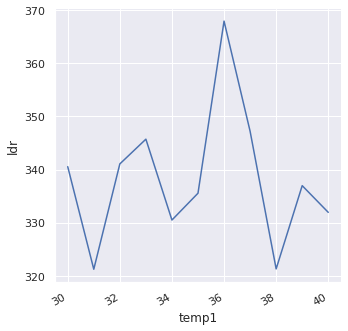

In [67]:
g = sns.relplot(x="temp1", y="ldr",ci=None, kind="line", data=df)
g.fig.autofmt_xdate()

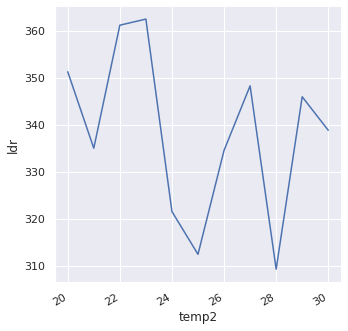

In [68]:
g = sns.relplot(x="temp2", y="ldr",ci=None, kind="line", data=df)
g.fig.autofmt_xdate()

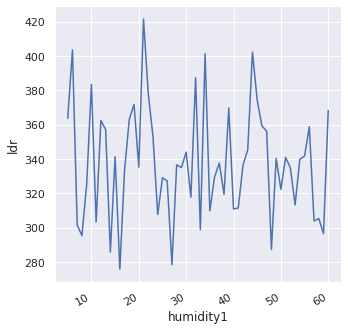

In [69]:
g = sns.relplot(x="humidity1", y="ldr",ci=None, kind="line", data=df)
g.fig.autofmt_xdate()

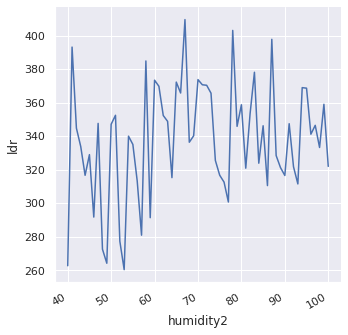

In [70]:
g = sns.relplot(x="humidity2", y="ldr",ci=None, kind="line", data=df)
g.fig.autofmt_xdate()

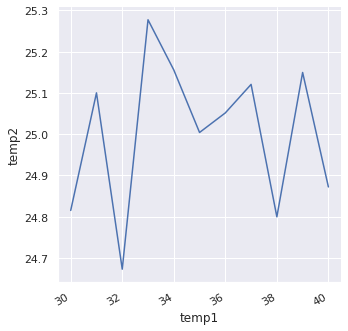

In [71]:
g = sns.relplot(x="temp1", y="temp2",ci=None, kind="line", data=df)
g.fig.autofmt_xdate()

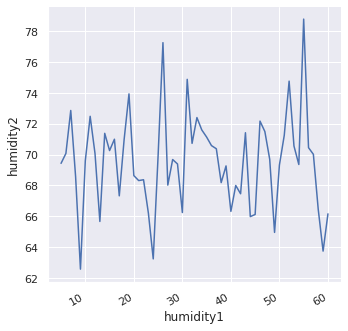

In [72]:
g = sns.relplot(x="humidity1", y="humidity2",ci=None, kind="line", data=df)
g.fig.autofmt_xdate()

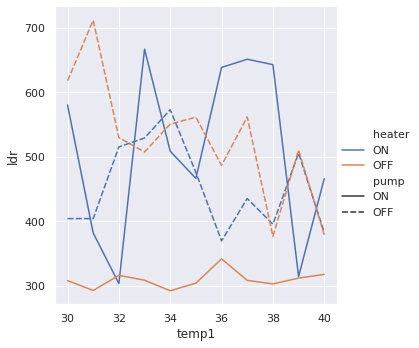

In [73]:
sns.relplot(x="temp1", y="ldr",hue="heater", style="pump",ci=None,kind="line", data=df);

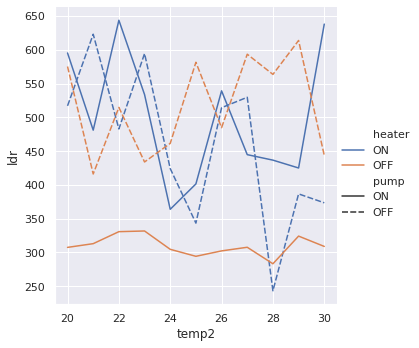

In [74]:
sns.relplot(x="temp2", y="ldr",hue="heater", style="pump",ci=None,kind="line", data=df);

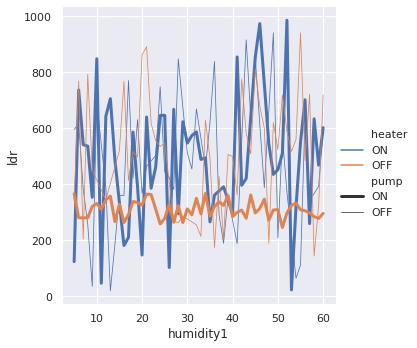

In [75]:
sns.relplot(x="humidity1", y="ldr",hue="heater", size="pump",ci=None,kind="line", data=df);

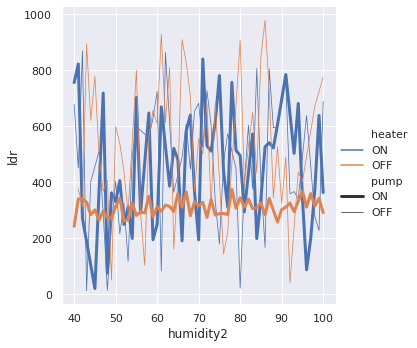

In [76]:
sns.relplot(x="humidity2", y="ldr",hue="heater", size="pump",ci=None,kind="line", data=df);

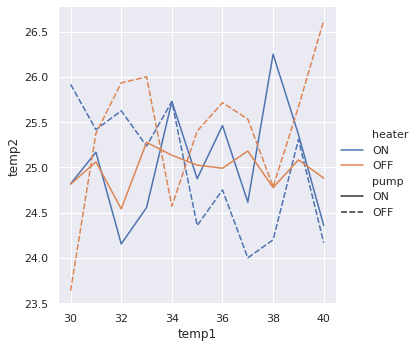

In [77]:
sns.relplot(x="temp1", y="temp2",hue="heater", style="pump",ci=None,kind="line", data=df);

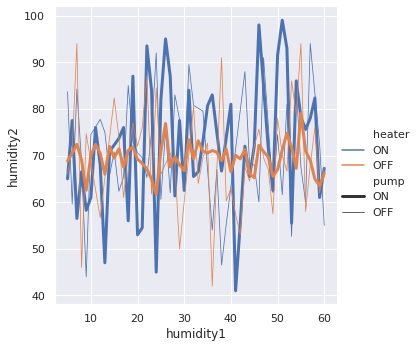

In [78]:
sns.relplot(x="humidity1", y="humidity2",hue="heater", size="pump",ci=None,kind="line", data=df);

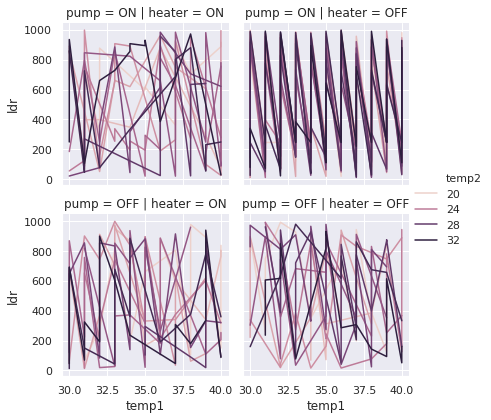

In [79]:
sns.relplot(x="temp1", y="ldr", hue="temp2",
            col="heater", row="pump", height=3,
            kind="line",ci=None,estimator=None, data=df);

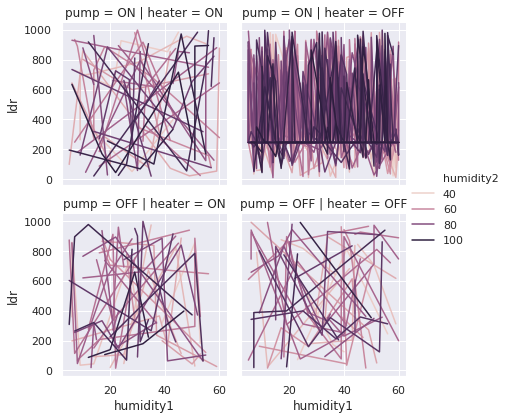

In [80]:
sns.relplot(x="humidity1", y="ldr", hue="humidity2",
            col="heater", row="pump", height=3,
            kind="line",ci=None,estimator=None, data=df);

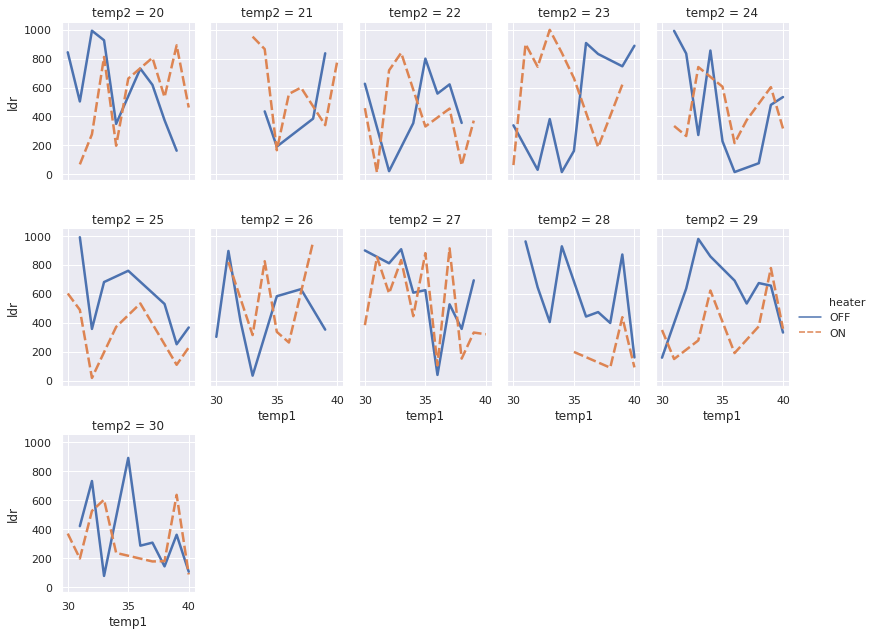

In [81]:
sns.relplot(x="temp1", y="ldr", hue="heater", style="heater",
            col="temp2", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,ci=None,
            kind="line", data=df.query("pump == 'OFF'"));

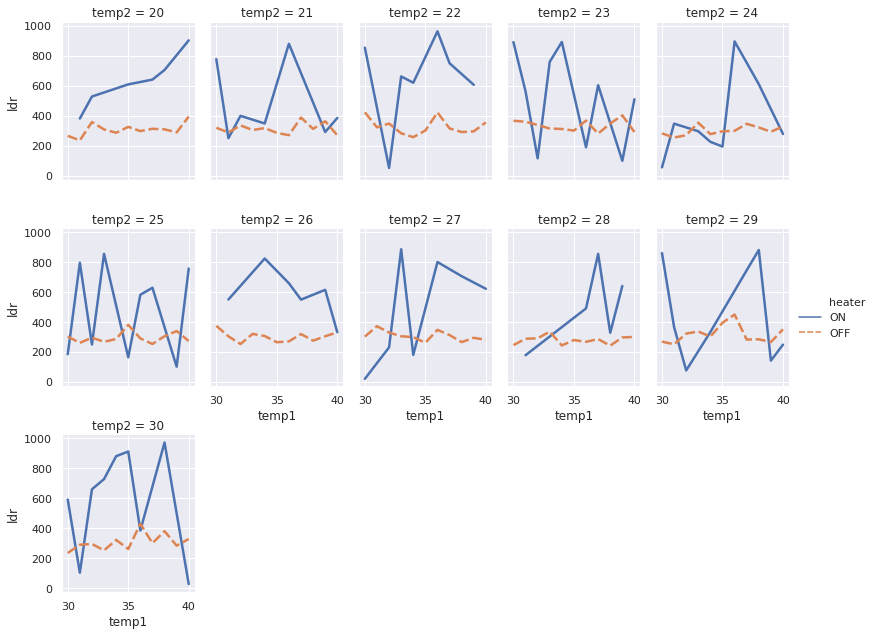

In [82]:
sns.relplot(x="temp1", y="ldr", hue="heater", style="heater",
            col="temp2", col_wrap=5,ci=None,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df.query("pump == 'ON'"));

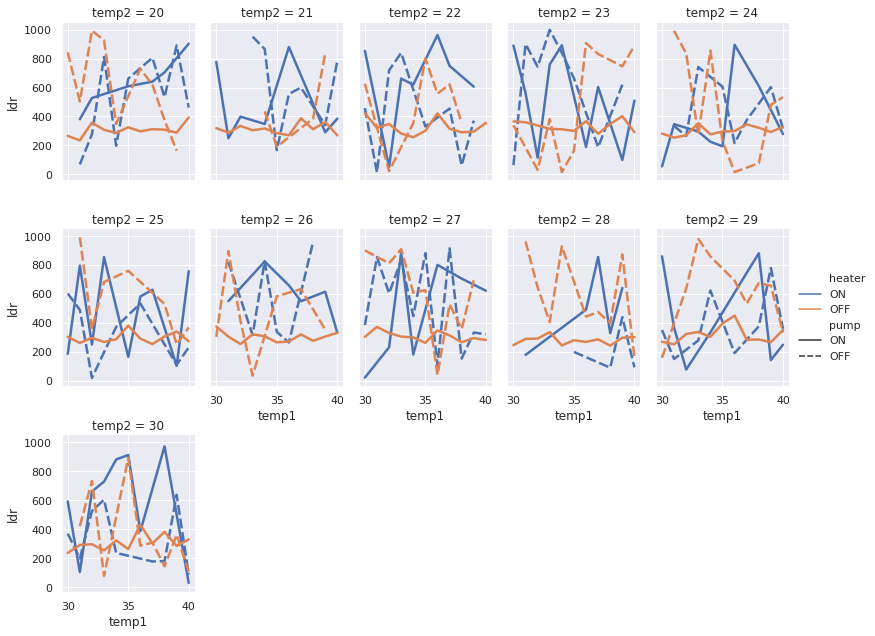

In [83]:
sns.relplot(x="temp1", y="ldr", hue="heater", style="pump",
            col="temp2", col_wrap=5,ci=None,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df);

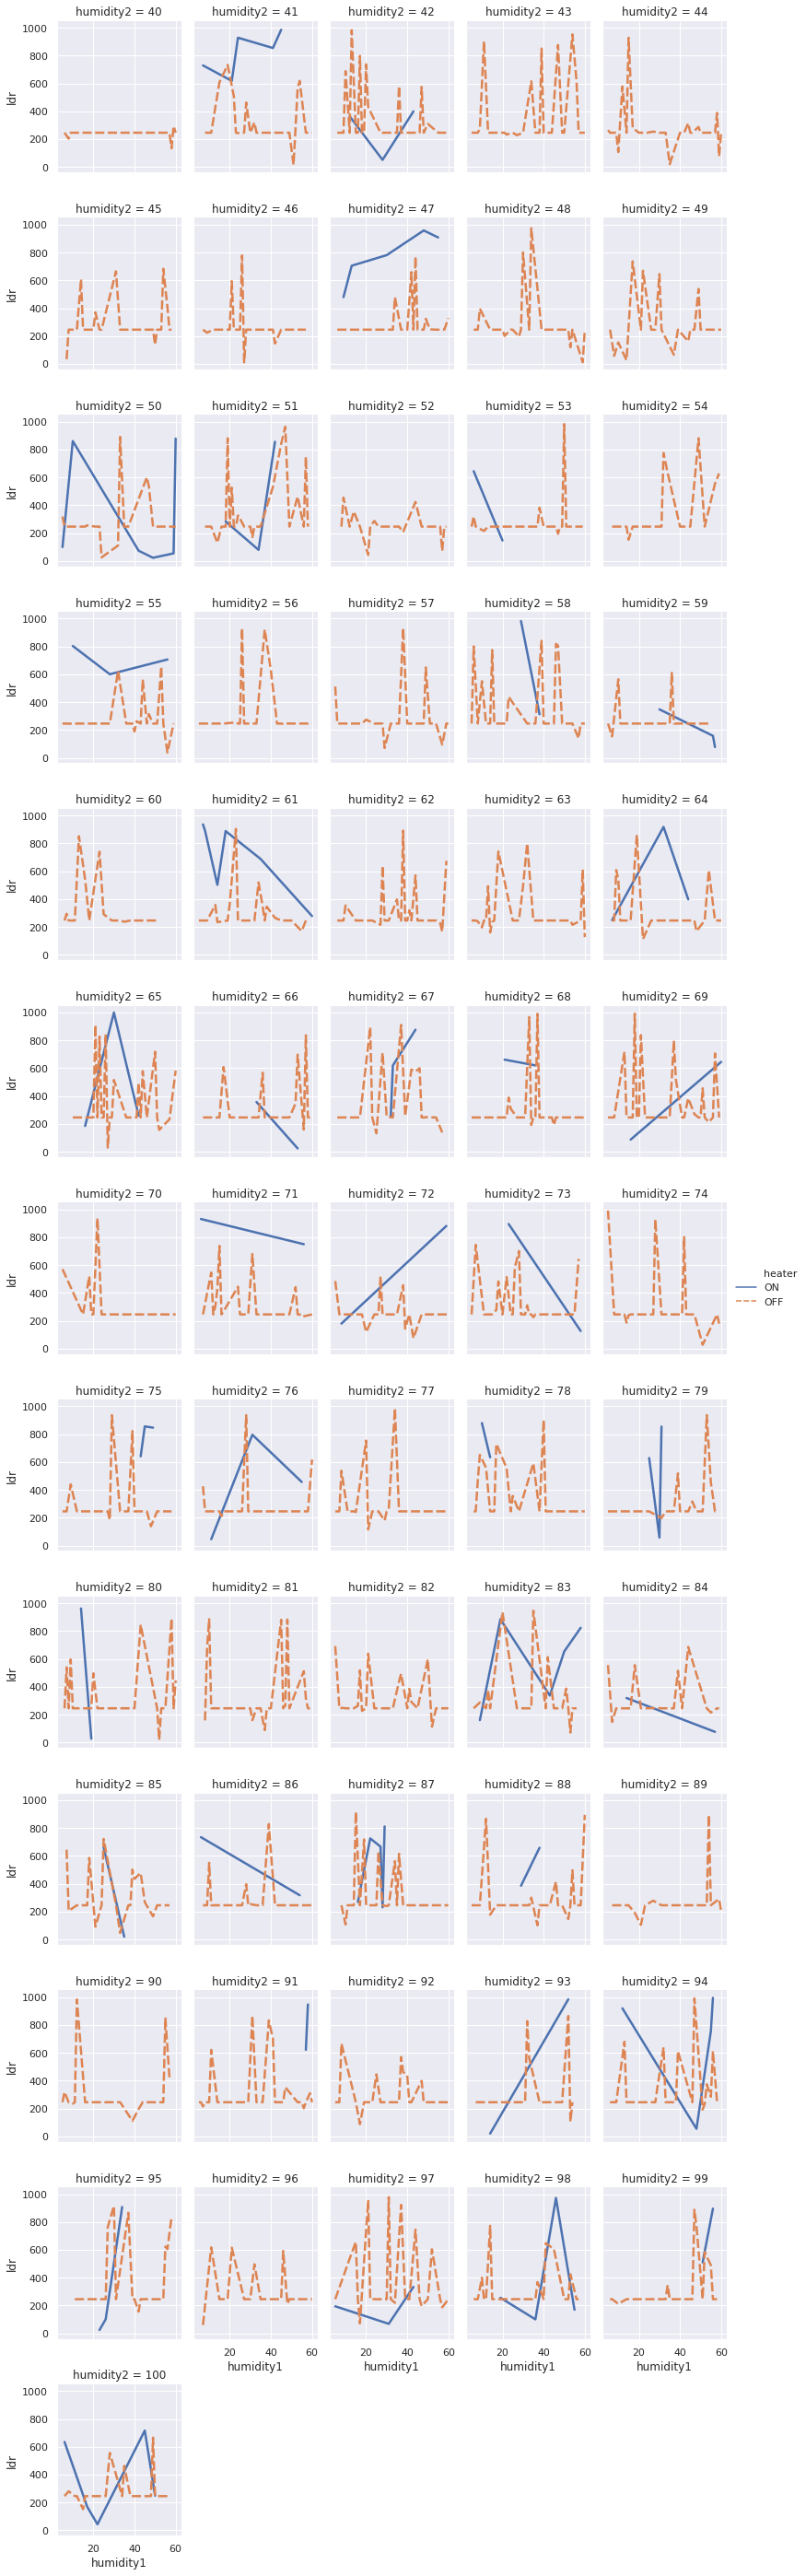

In [84]:
sns.relplot(x="humidity1", y="ldr", hue="heater", style="heater",
            col="humidity2", col_wrap=5,ci=None,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df.query("pump == 'ON'"));

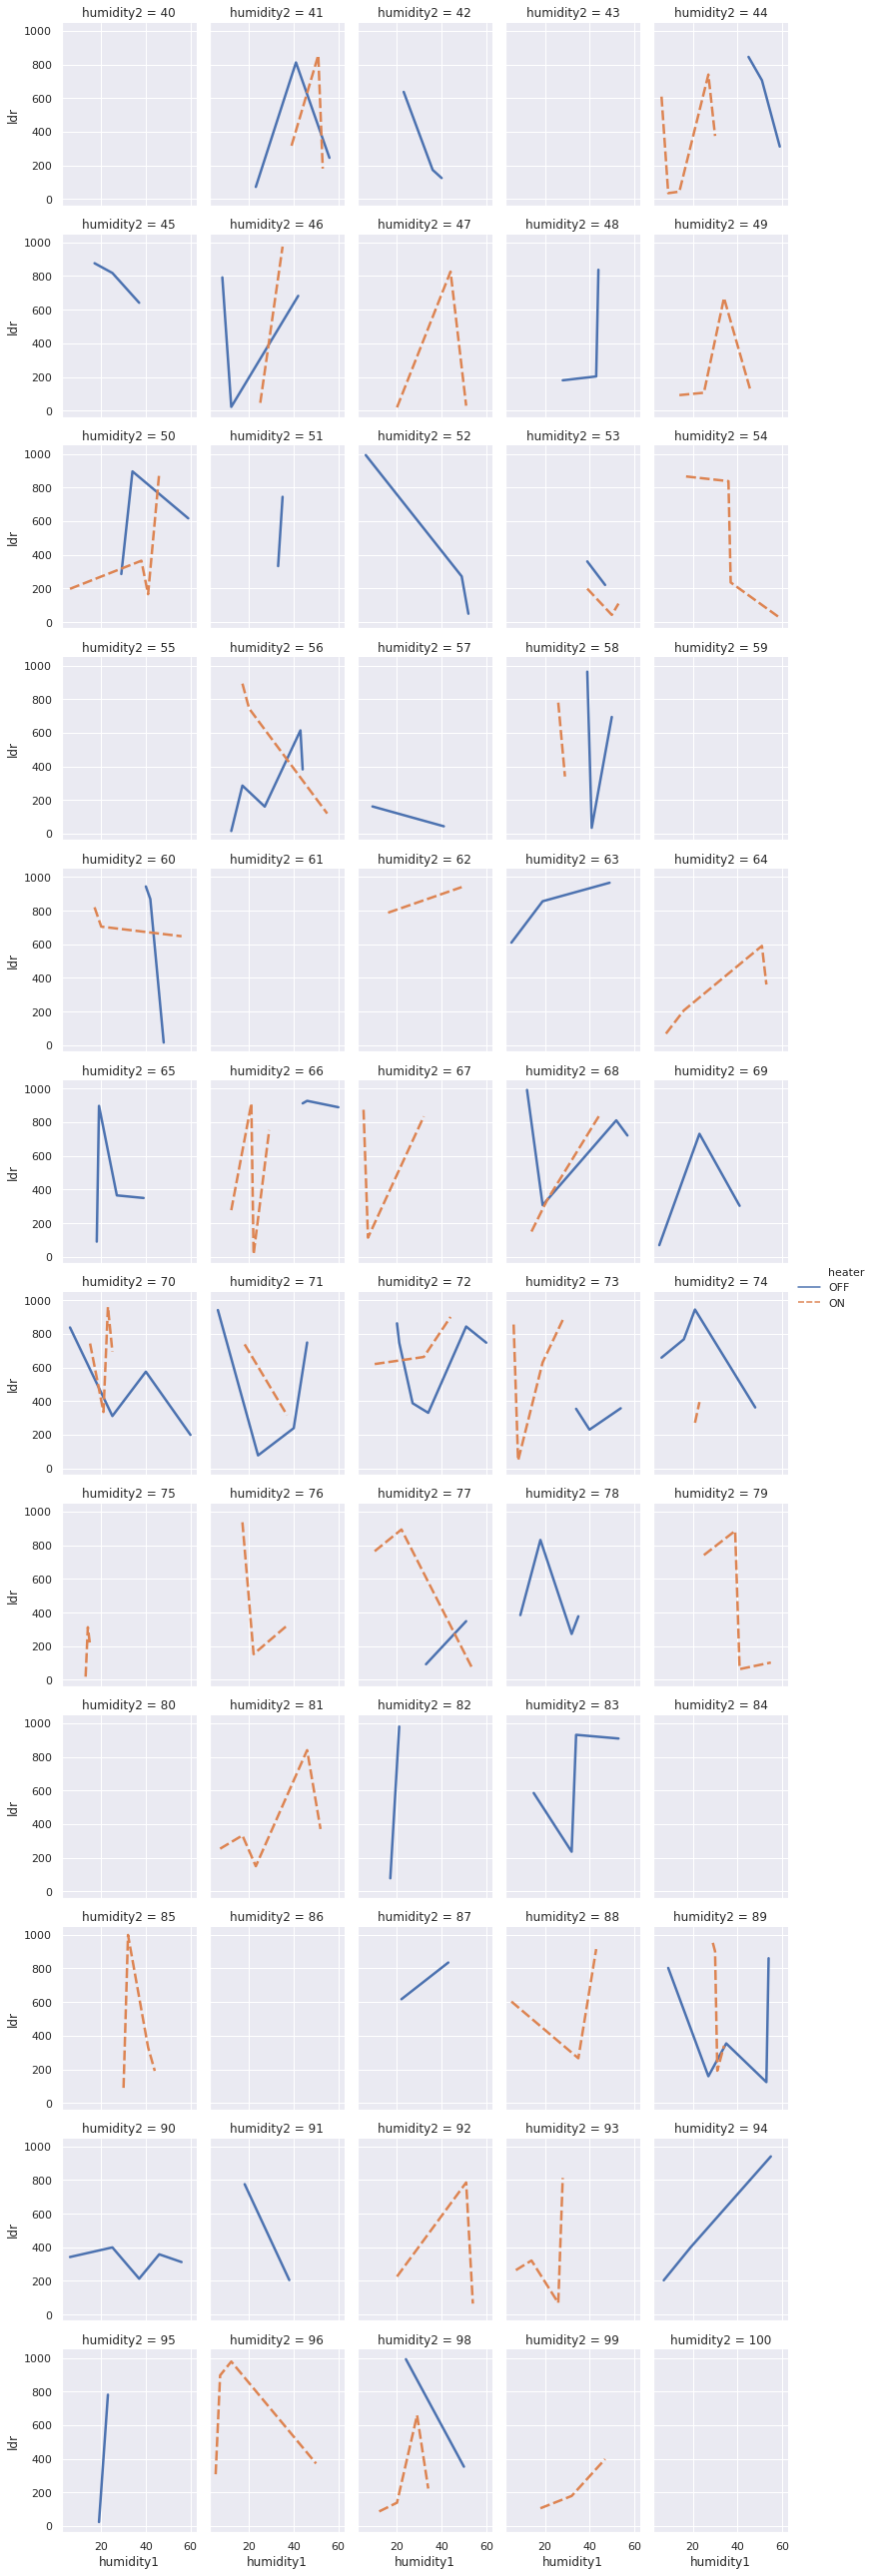

In [85]:
sns.relplot(x="humidity1", y="ldr", hue="heater", style="heater",
            col="humidity2", col_wrap=5,ci=None,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df.query("pump == 'OFF'"));

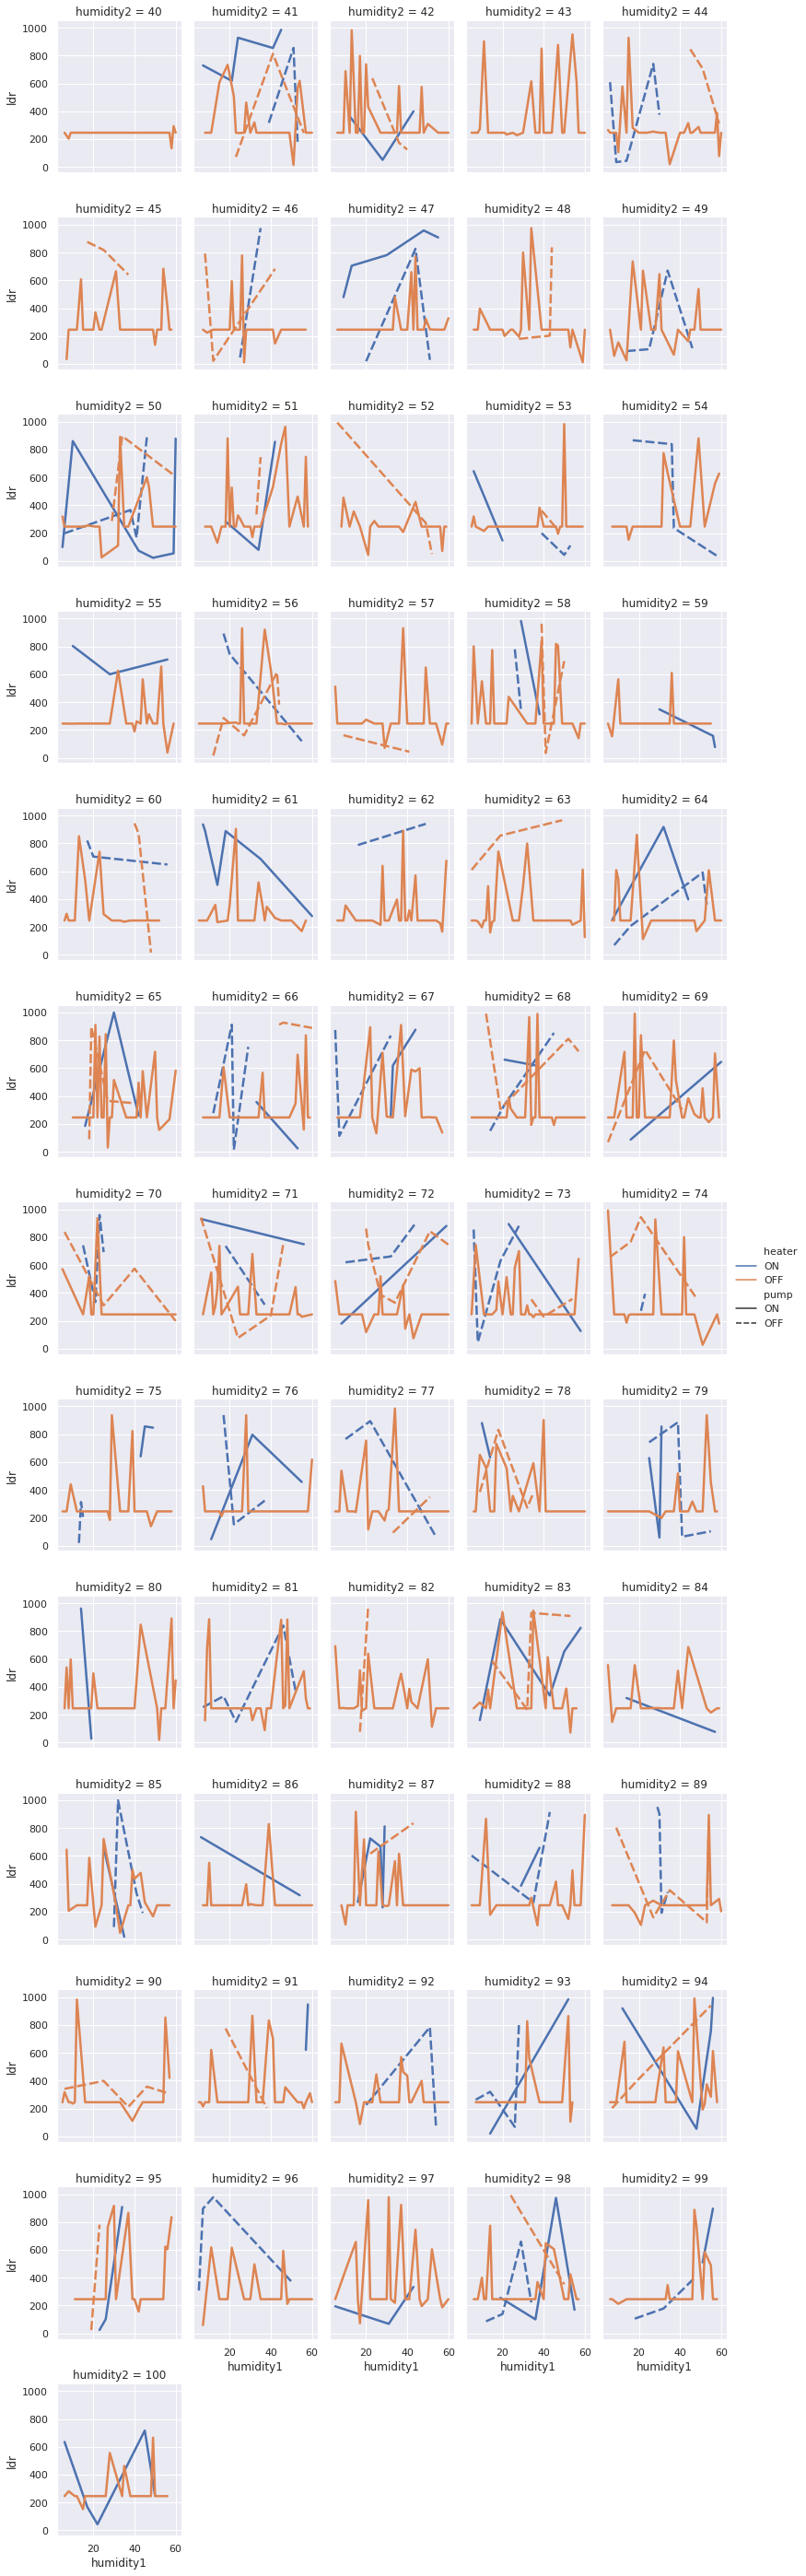

In [86]:
sns.relplot(x="humidity1", y="ldr", hue="heater", style="pump",
            col="humidity2", col_wrap=5,ci=None,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df);

In [87]:
# This block creates a list for entries for temp1, temp2, humidity1 and humidity2
#It also finds the total number of intries and uses that to calculate number of entries per minute
temp1 = []
humidity1 = []
temp2 = []
humidity2 = []
for k1 in df.temp1:
    temp1.append(k1)

for k2 in df.temp2:   
    temp2.append(k2)

for k3 in df.humidity1:
    humidity1.append(k3)

for k4 in df.humidity2:
    humidity2.append(k4)
size=len(temp1)
print("size =" +str(size))
#the data was generated for 45 mins
num_per_min=size//45
print("num_per_min =" +str(num_per_min))

size =2638
num_per_min =58


In [0]:
#This block of code finds the average data per minute for temp1, temp2, humidty1 and humidity2
#These data are put in a list
average_temp1_per_min=[]
average_temp2_per_min=[]
average_humidity1_per_min=[]
average_humidity2_per_min=[]
curSumt1=0
curSumt2=0
curSumh1=0
curSumh2=0
count=0
total_count=0
curAvrgt1=0
curAvrgt2=0
curAvrgh1=0
curAvrgh2=0
#goes through lists created initially and computes avarage of every 58 entries
for k in range(2638):
  count+=1
  total_count+=1

  curSumt1+=temp1[k]
  curSumt2+=temp2[k]
  curSumh1+=humidity1[k]
  curSumh2+=humidity2[k]

  if(count==58):
    #compute average and append to list
    curAvrgt1=curSumt1/count
    average_temp1_per_min.append(curAvrgt1)
    #compute average and append to list
    curAvrgt2=curSumt2/count
    average_temp2_per_min.append(curAvrgt2)
    #compute average and append to list
    curAvrgh1=curSumh1/count
    average_humidity1_per_min.append(curAvrgh1)
    #compute average and append to list
    curAvrgh2=curSumh2/count
    average_humidity2_per_min.append(curAvrgh2)

    curSumt1=0
    curSumt2=0
    curSumh1=0
    curSumh2=0
    count=0
    
  #Computes average of remaining entries (less than 58 entries)
  if(total_count==2638 and count>0):

    curAvrgt1=curSumt1/count
    average_temp1_per_min.append(curAvrgt1)

    curAvrgt2=curSumt2/count
    average_temp2_per_min.append(curAvrgt2)

    curAvrgh1=curSumh1/count
    average_humidity1_per_min.append(curAvrgh1)

    curAvrgh2=curSumh2/count
    average_humidity2_per_min.append(curAvrgh2)

    curSumt1=0
    curSumt2=0
    curSumh1=0
    curSumh2=0
    count=0


In [0]:
#This block of code finds the sum average of the average entry per minute
#for "temp1 and temp2" & for "humidity1 and humidity2"
time=[]
sum_avrg_temp=[]
sum_avrg_humidity=[]
for m in range(len(average_temp1_per_min)):
  av_t=(average_temp1_per_min[m]+average_temp2_per_min[m])/2
  sum_avrg_temp.append(av_t)

  av_h=(average_humidity1_per_min[m]+average_humidity2_per_min[m])/2
  sum_avrg_humidity.append(av_h)
  time.append(m)

In [0]:
#This block of code writes the averages to a csv file
import csv
with open('averages.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["time", "avrg_temp1", "avrg_temp2","avrg_humidity1","avrg_humidity2","sum_avrg_temp","sum_avrg_humidity"])
    for n in range(len(average_temp1_per_min)):
      writer.writerow([time[n], average_temp1_per_min[n], average_temp2_per_min[n],average_humidity1_per_min[n],average_humidity2_per_min[n],sum_avrg_temp[n],sum_avrg_humidity[n]])

In [93]:
df1=pd.read_csv("averages.csv")
df1.head()

time  avrg_temp1  ...  sum_avrg_temp  sum_avrg_humidity
0     0   35.258621  ...      30.612069          49.948276
1     1   34.810345  ...      29.706897          52.215517
2     2   35.258621  ...      30.198276          50.767241
3     3   34.706897  ...      30.000000          52.931034
4     4   34.172414  ...      29.344828          48.775862

[5 rows x 7 columns]

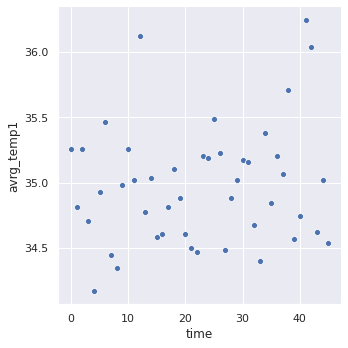

In [94]:
sns.relplot(x="time", y="avrg_temp1", data=df1);

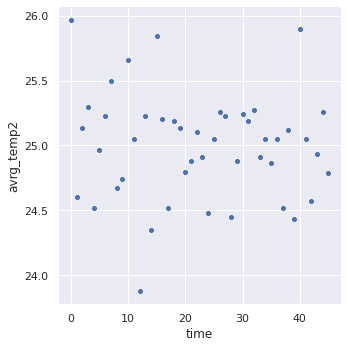

In [95]:
sns.relplot(x="time", y="avrg_temp2", data=df1);

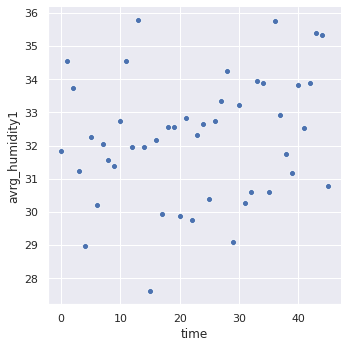

In [96]:
sns.relplot(x="time", y="avrg_humidity1", data=df1);

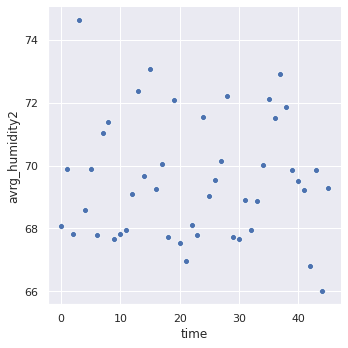

In [97]:
sns.relplot(x="time", y="avrg_humidity2", data=df1);

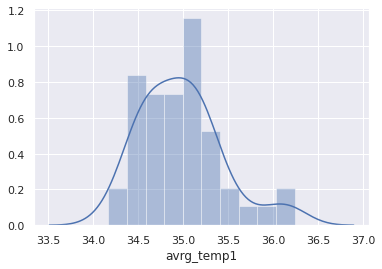

In [98]:
sns.distplot(df1["avrg_temp1"],bins=10)

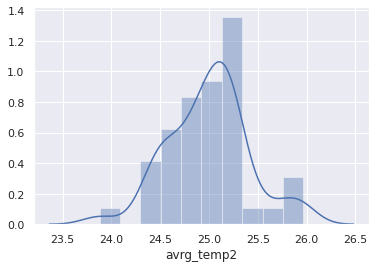

In [99]:
sns.distplot(df1["avrg_temp2"],bins=10)

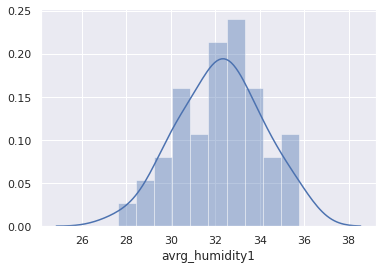

In [100]:
sns.distplot(df1["avrg_humidity1"],bins=10)

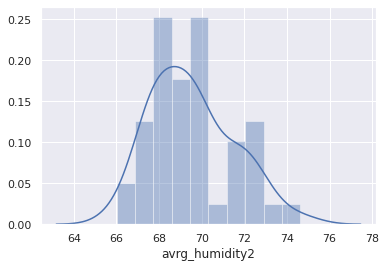

In [101]:
sns.distplot(df1["avrg_humidity2"],bins=10)

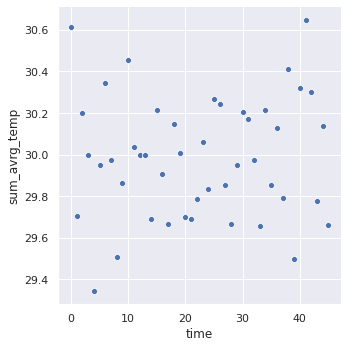

In [102]:
sns.relplot(x="time", y="sum_avrg_temp", data=df1);

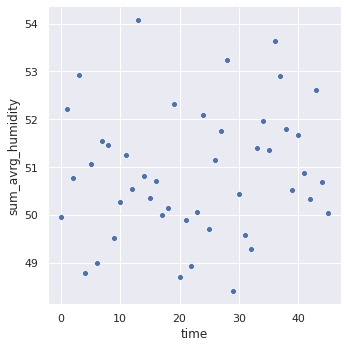

In [103]:
sns.relplot(x="time", y="sum_avrg_humidity", data=df1);

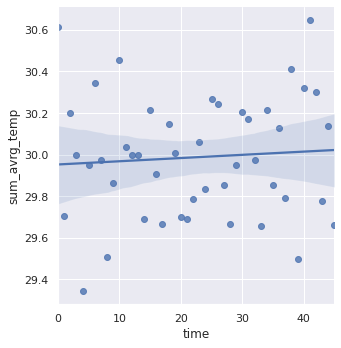

In [104]:
sns.lmplot(x="time", y="sum_avrg_temp", data=df1);

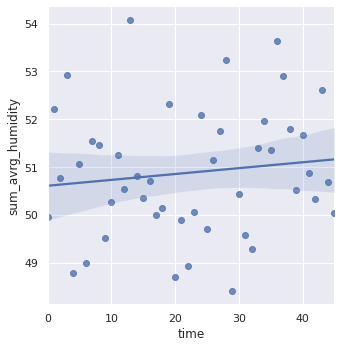

In [105]:
sns.lmplot(x="time", y="sum_avrg_humidity", data=df1);

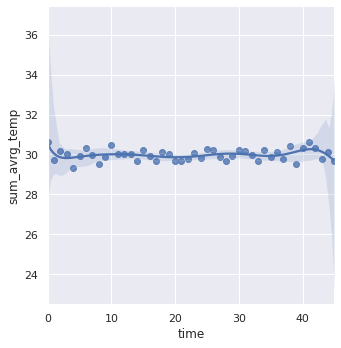

In [106]:
sns.lmplot(x="time", y="sum_avrg_temp",order=10, data=df1);

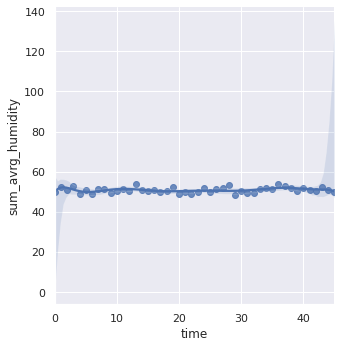

In [107]:
sns.lmplot(x="time", y="sum_avrg_humidity",order=10, data=df1);

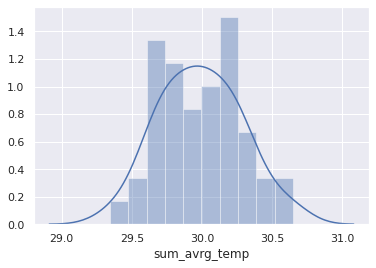

In [108]:
sns.distplot(df1["sum_avrg_temp"],bins=10)

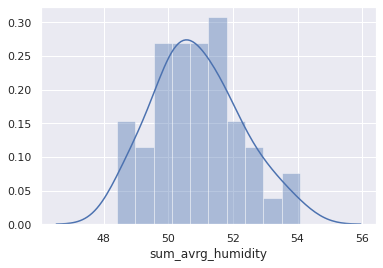

In [109]:
sns.distplot(df1["sum_avrg_humidity"],bins=10)

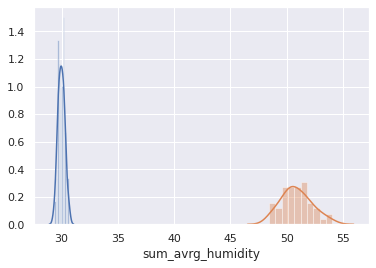

In [110]:
sns.distplot(df1["sum_avrg_temp"],bins=10)
sns.distplot(df1["sum_avrg_humidity"],bins=10)

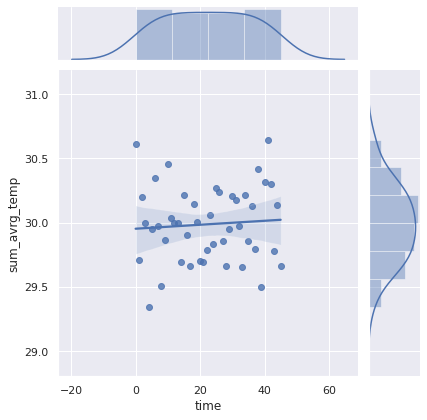

In [111]:
sns.jointplot(x="time", y="sum_avrg_temp", data=df1, kind="reg");

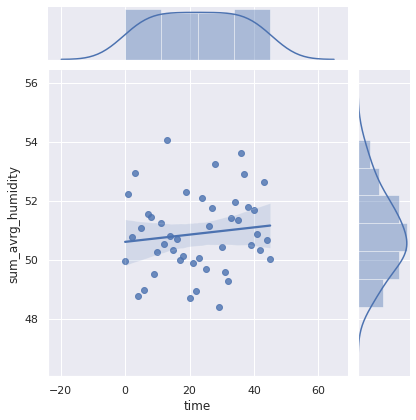

In [112]:
sns.jointplot(x="time", y="sum_avrg_humidity", data=df1, kind="reg");

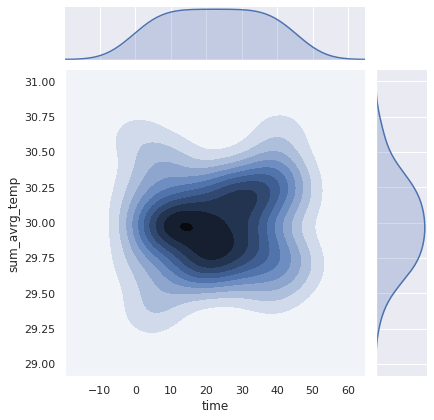

In [113]:
sns.jointplot(data = df1, x = "time", y = "sum_avrg_temp", kind='kde')

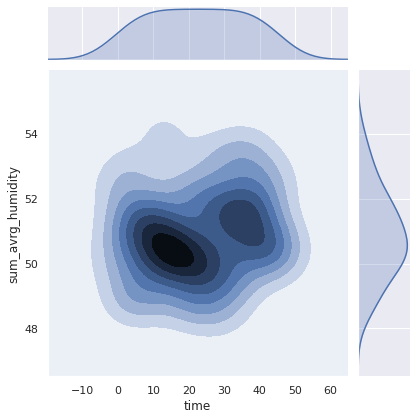

In [114]:
sns.jointplot(data = df1, x = "time", y = "sum_avrg_humidity", kind='kde')

In [0]:
import csv

In [0]:
with open('sep_avrgs.csv', 'w', newline='') as file:
    writer1 = csv.writer(file)
    writer1.writerow(["time", "avrg_temp", "temp_num","avrg_humidity","humidity_num"])
    for q in range(len(average_temp1_per_min)):
      writer1.writerow([time[q], average_temp1_per_min[q],"temp1",average_humidity1_per_min[q],"humidity1"])

    for r in range(len(average_temp1_per_min)):
      writer1.writerow([time[r], average_temp2_per_min[r],"temp2",average_humidity2_per_min[r],"humidity2"])

In [117]:
df2=pd.read_csv("sep_avrgs.csv")
df2.head()

time  avrg_temp temp_num  avrg_humidity humidity_num
0     0  35.258621    temp1      31.827586    humidity1
1     1  34.810345    temp1      34.551724    humidity1
2     2  35.258621    temp1      33.724138    humidity1
3     3  34.706897    temp1      31.241379    humidity1
4     4  34.172414    temp1      28.965517    humidity1

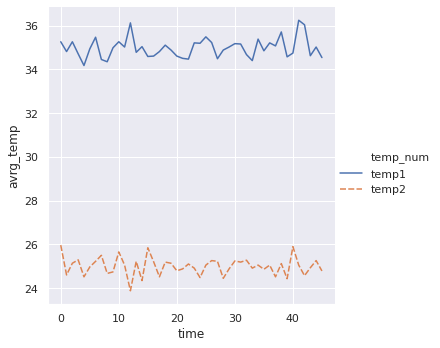

In [118]:
sns.relplot(x="time", y="avrg_temp",hue="temp_num", style="temp_num", ci=None, kind="line", data=df2);

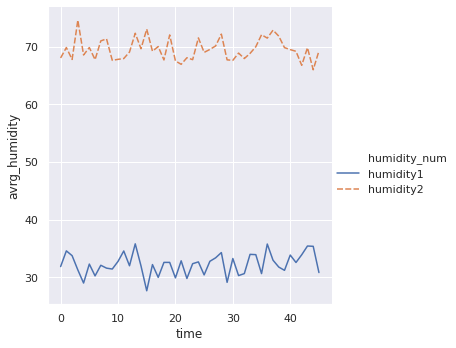

In [119]:
sns.relplot(x="time", y="avrg_humidity",hue="humidity_num", style="humidity_num", ci=None, kind="line", data=df2);

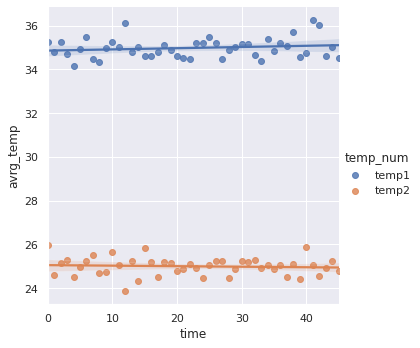

In [120]:
sns.lmplot(x="time", y="avrg_temp",hue="temp_num",  data=df2);

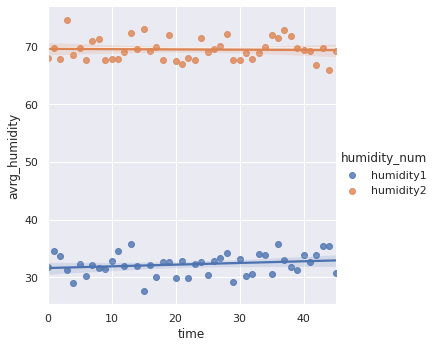

In [121]:
sns.lmplot(x="time", y="avrg_humidity",hue="humidity_num",  data=df2);

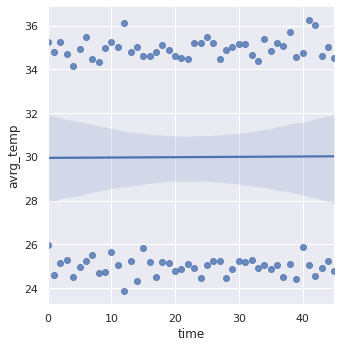

In [122]:
sns.lmplot(x="time", y="avrg_temp", data=df2);

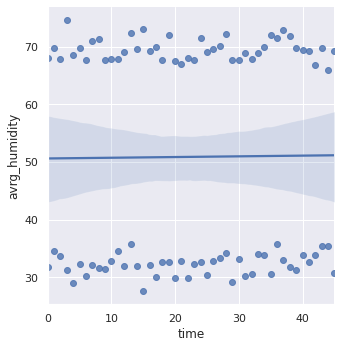

In [123]:
sns.lmplot(x="time", y="avrg_humidity", data=df2);

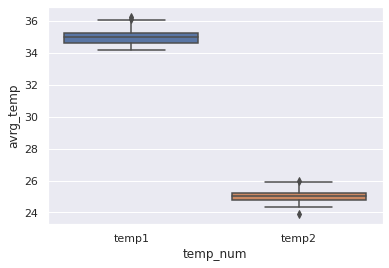

In [124]:
sns.boxplot(data = df2, x = "temp_num", y = "avrg_temp")

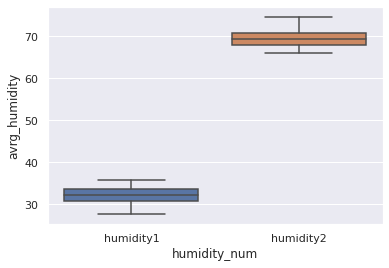

In [125]:
sns.boxplot(data = df2, x = "humidity_num", y = "avrg_humidity")